<a href="https://colab.research.google.com/github/Devi-karthick/classification-with-localization/blob/main/Classification_with_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

In [ ]:
TEST_PATH = "sample_data/FER/test"
TRAIN_PATH  = "sample_data/FER/train"

In [ ]:
print("Loading Dataset...")

RGB_SIZE = 48

datagen = ImageDataGenerator(rescale=1./255)

train_gray = datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_gray = datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

train_rgb = datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(RGB_SIZE, RGB_SIZE),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_rgb = datagen.flow_from_directory(
    TEST_PATH,
    target_size=(RGB_SIZE, RGB_SIZE),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Loading Dataset...


NameError: name 'IMG_SIZE' is not defined

In [ ]:
print("\nBuilding CNN Model...")

NUM_CLASSES = 8 # Define NUM_CLASSES based on the dataset

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()


Building CNN Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,272 (2.36 MB)

 Trainable params: 619,272 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\nTraining CNN...")

EPOCHS_CNN = 10 # Define the number of epochs for CNN training
history_cnn = cnn_model.fit(
    train_gray,
    validation_data=test_gray,
    epochs=EPOCHS_CNN
)

cnn_loss, cnn_acc = cnn_model.evaluate(test_gray)
print("CNN Accuracy:", cnn_acc)


Training CNN...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1034 - loss: 2.0842 - val_accuracy: 0.1429 - val_loss: 2.0423
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step - accuracy: 0.1034 - loss: 2.0459 - val_accuracy: 0.1429 - val_loss: 2.0193
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.1724 - loss: 2.0229 - val_accuracy: 0.1429 - val_loss: 2.0029
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.1724 - loss: 1.9984 - val_accuracy: 0.1429 - val_loss: 1.9952
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.2069 - loss: 1.9836 - val_accuracy: 0.1071 - val_loss: 1.9947
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.1379 - loss: 1.9380 - val_accuracy: 0.1429 - val_loss: 1.9931
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.0345 - loss: 2.1006 - val_accuracy: 0.1429 - val_loss: 1.9912
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.1724 - loss: 2.0154 - val_accuracy: 0.1429 - val_loss: 1.9899
Epoch 

In [ ]:
print("\nBuilding Transfer Learning Model...")

base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(RGB_SIZE, RGB_SIZE, 3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

tl_model = Model(inputs=base_model.input, outputs=output)

tl_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

tl_model.summary()


Building Transfer Learning Model...


/tmp/ipython-input-2995450593.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 24, 24,    │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 24, 24,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 24, 24,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 24, 24,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 24, 24,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 24, 24,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 24, 24,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 24, 24,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 25, 25,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 12, 12,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 12, 12,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 12, 12,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 12, 12,    │      2,304 │ block_1_depthwis

 Total params: 2,422,984 (9.24 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
print("\nTraining Transfer Learning Model...")

EPOCHS_TL = 10 # Define the number of epochs for Transfer Learning training
history_tl = tl_model.fit(
    train_rgb,
    validation_data=test_rgb,
    epochs=EPOCHS_TL
)

tl_loss, tl_acc = tl_model.evaluate(test_rgb)
print("Transfer Learning Accuracy:", tl_acc)


Training Transfer Learning Model...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0690 - loss: 2.3745 - val_accuracy: 0.1786 - val_loss: 2.2533
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.5517 - loss: 1.4637 - val_accuracy: 0.1786 - val_loss: 2.1474
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.8966 - loss: 0.9089 - val_accuracy: 0.1786 - val_loss: 2.0811
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 1.0000 - loss: 0.5901 - val_accuracy: 0.1786 - val_loss: 2.0527
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 1.0000 - loss: 0.3929 - val_accuracy: 0.1786 - val_loss: 2.0557
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 1.0000 - loss: 0.2643 - val_accuracy: 0.1786 - val_loss: 2.0928
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 1.0000 - loss: 0.1818 - val_accuracy: 0.2500 - val_loss: 2.1488
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 1.0000 - loss: 0.1284 - val_accuracy: 0.2500 - val_loss: 2.2173
Epoch 

In [ ]:
cnn_model.save("cnn_fer_model.h5")
tl_model.save("mobilenet_fer_model.h5")
print("\nModels Saved Successfully!")


Models Saved Successfully!


In [ ]:
plt.figure(figsize=(12,5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

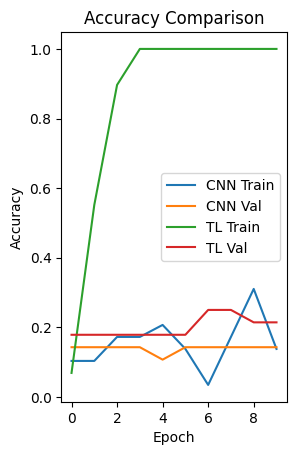

In [ ]:
plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label="CNN Train")
plt.plot(history_cnn.history['val_accuracy'], label="CNN Val")
plt.plot(history_tl.history['accuracy'], label="TL Train")
plt.plot(history_tl.history['val_accuracy'], label="TL Val")
plt.title("Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

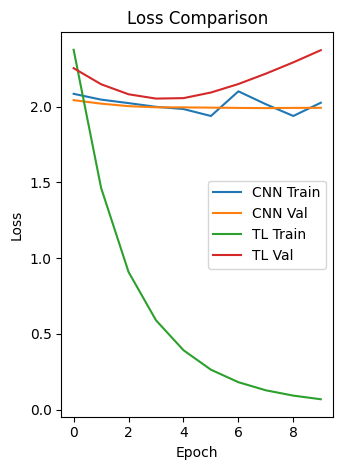

In [ ]:
plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label="CNN Train")
plt.plot(history_cnn.history['val_loss'], label="CNN Val")
plt.plot(history_tl.history['loss'], label="TL Train")
plt.plot(history_tl.history['val_loss'], label="TL Val")
plt.title("Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("\n==============================")
print("MODEL COMPARISON")
print("==============================")
print(f"CNN Accuracy: {cnn_acc*100:.2f}%")
print(f"Transfer Learning Accuracy: {tl_acc*100:.2f}%")

if tl_acc > cnn_acc:
    print("Transfer Learning performs better than CNN")
else:
    print("CNN performs better than Transfer Learning")

print("==============================")


MODEL COMPARISON
CNN Accuracy: 14.29%
Transfer Learning Accuracy: 21.43%
Transfer Learning performs better than CNN
